In [58]:
pip install  prince

In [59]:
pip install sentence_transformers

In [60]:
pip install  umap-learn

In [61]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.cluster import KMeans
import umap
import pandas as pd
from prince import CA, PCA
from sklearn.manifold import TSNE

def dim_red(mat, p, method):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list
        p : number of dimensions to keep
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''

    if method=='ACP':
        # Convert input to pandas DataFrame if it's a numpy array
        if isinstance(mat, np.ndarray):
            mat = pd.DataFrame(mat)

        # Perform PCA
        pca = PCA(n_components=p)
        red_mat = pca.fit_transform(mat)
        #red_mat = mat[:,:p]

    elif method=='AFC':
        # Convertir les données en un DataFrame
        df = pd.DataFrame(mat)

        df_positive = df + np.abs(df.min().min())

        ca = CA(n_components=p)
        ca.fit(df_positive)
        red_mat = ca.row_coordinates(df_positive)

    elif method=='UMAP':

        reducer = umap.UMAP(n_components=p)
        red_mat = reducer.fit_transform(mat)

    elif method =='TSNE':

	    tsne = TSNE(n_components = p)
	    red_mat = tsne.fit_transform(mat)

    else:
        raise Exception("Please select one of the three methods : APC, AFC, UMAP")

    return red_mat


def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    kmeans = KMeans(n_clusters=k, random_state=42)
    pred = kmeans.fit_predict(mat)

    return pred




In [62]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)


Method:  ACP


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Method: ACP
NMI: 0.30 
ARI: 0.10



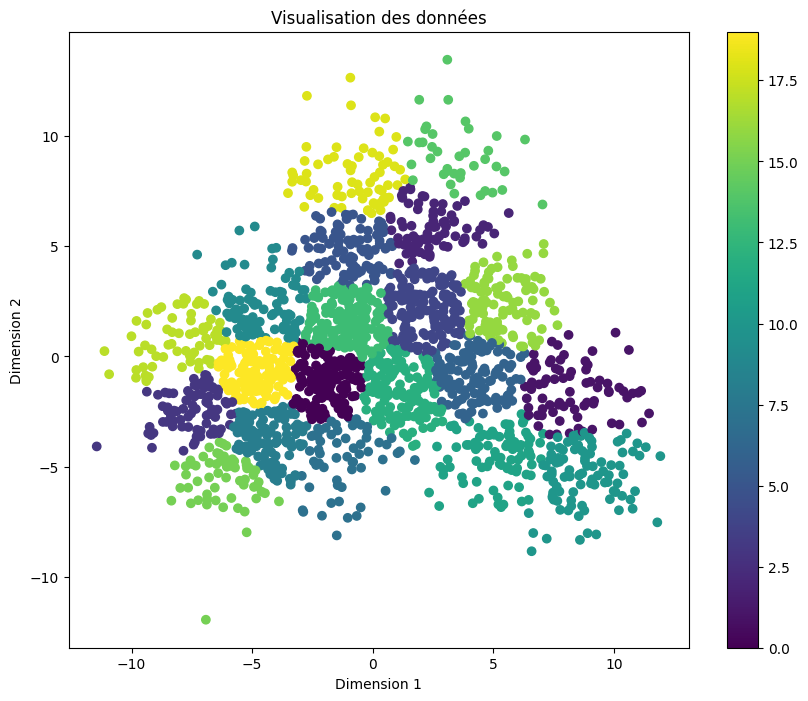

Method:  AFC


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Method: AFC
NMI: 0.29 
ARI: 0.09



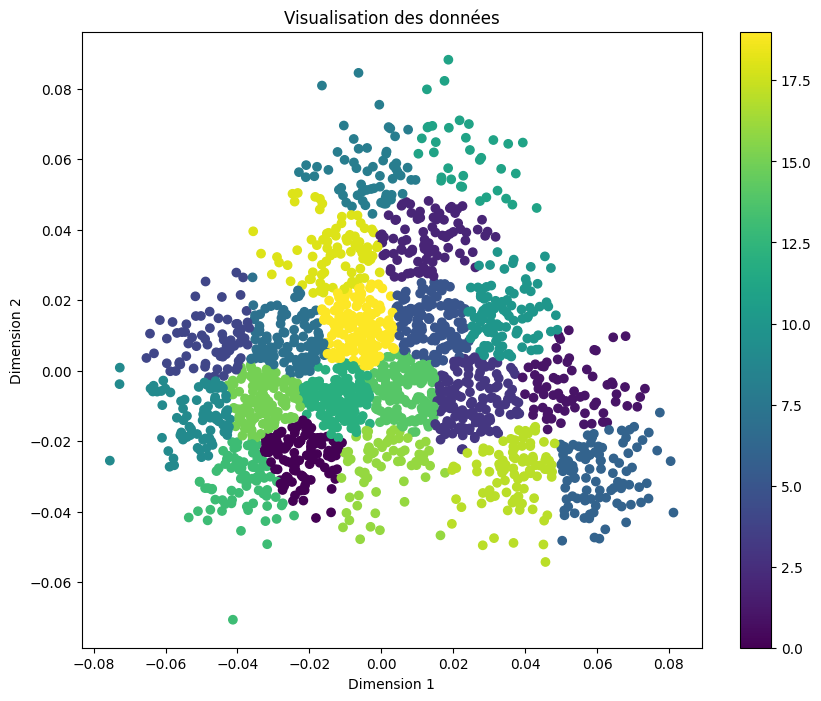

Method:  UMAP


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Method: UMAP
NMI: 0.45 
ARI: 0.26



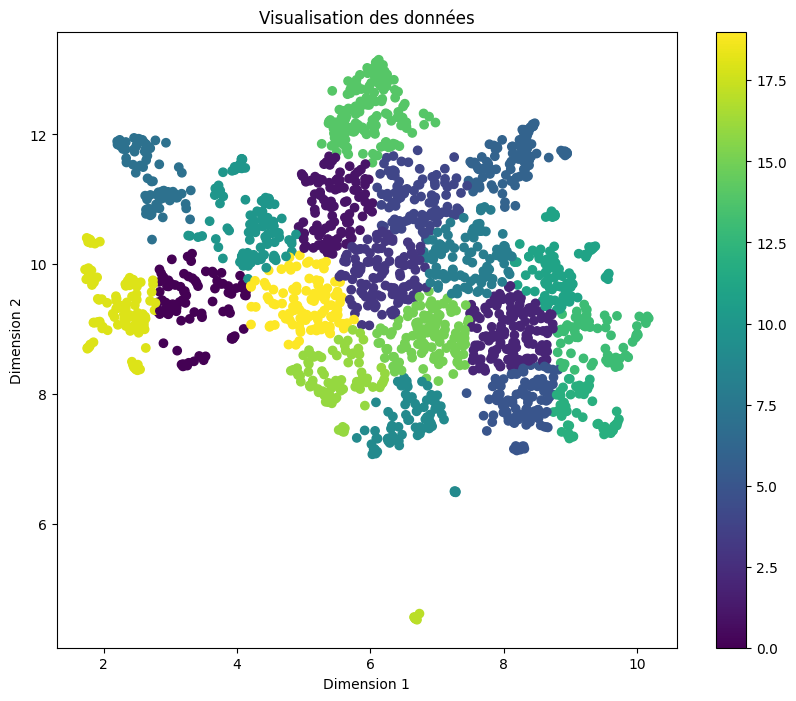

Method:  TSNE


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Method: TSNE
NMI: 0.41 
ARI: 0.22



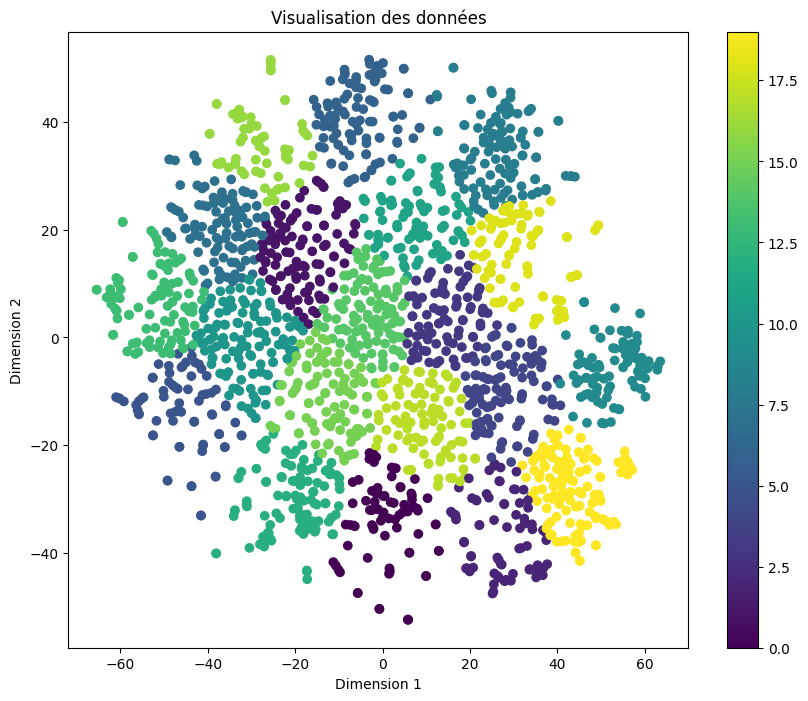

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (votre code existant)

# Perform dimensionality reduction and clustering for each method
methods = ['ACP', 'AFC','UMAP','TSNE']
for method in methods:
    print("Method: ", method)
    # Perform dimensionality reduction
    red_emb = dim_red(embeddings, 2, method)  # Utilisez 2 dimensions pour le graphique de dispersion

    # Perform clustering
    pred = clust(red_emb, k)

    # Evaluate clustering results
    nmi_score = normalized_mutual_info_score(pred, labels)
    ari_score = adjusted_rand_score(pred, labels)

    # Print results
    print(f'Method: {method}\nNMI: {nmi_score:.2f} \nARI: {ari_score:.2f}\n')
    #print("SHAAAAAAAAAAAAAAAAPE", red_emb.shape)
    # Plot the reduced data
# Plot the reduced data
# Plot the reduced data
# Ou visualiser avec Seaborn
    data = red_emb
    #print(pred)
    #print(red_emb)
    df = pd.DataFrame(red_emb)
    plt.figure(figsize=(10, 8))
    plt.scatter(df[0], df[1],c = pred)
    plt.title('Visualisation des données')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar()
    plt.show()